# Explorative Dataset Analysis

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter
import os
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords

In [ ]:
# Load the unified TSV file
annotations_path = "data/all_annotations.tsv"

In [ ]:
df = pd.read_csv(annotations_path, sep="\t")

Column names:
['tweet_id', 'image_id', 'text_info', 'text_info_conf', 'image_info', 'image_info_conf', 'text_human', 'text_human_conf', 'image_human', 'image_human_conf', 'image_damage', 'image_damage_conf', 'tweet_text', 'image_url', 'image_path', 'disaster_type']


,tweet_id,image_id,text_info,text_info_conf,image_info,image_info_conf,text_human,text_human_conf,image_human,image_human_conf,image_damage,image_damage_conf,tweet_text,image_url,image_path,disaster_type
0,917791044158185473,917791044158185473_0,informative,1.0000,informative,0.6766,other_relevant_information,1.0000,other_relevant_information,0.6766,NaN,NaN,RT @Gizmodo: Wildfires raging through Northern...,http://pbs.twimg.com/media/DLyi_WYVYAApwNg.jpg,data_image/california_wildfires/10_10_2017/917...,california_wildfires_final_data
1,917791130590183424,917791130590183424_0,informative,1.0000,informative,0.6667,infrastructure_and_utility_damage,1.0000,affected_individuals,0.6667,NaN,NaN,PHOTOS: Deadly wildfires rage in California ht...,http://pbs.twimg.com/media/DLymKm9UMAAu0qw.jpg,data_image/california_wildfires/10_10_2017/917...,california_wildfires_final_data
2,917791291823591425,917791291823591425_0,informative,0.6813,informative,1.0000,other_relevant_information,0.6813,infrastructure_and_utility_damage,1.0000,severe_damage,1.0,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...,http://pbs.twimg.com/media/DLudaaZV4AAjT7x.jpg,data_image/california_wildfires/10_10_2017/917...,california_wildfires_final_data
3,917791291823591425,917791291823591425_1,informative,0.6813,not_informative,1.0000,other_relevant_information,0.6813,not_humanitarian,1.0000,NaN,NaN,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...,http://pbs.twimg.com/media/DLudaZXUMAABAEZ.jpg,data_image/california_wildfires/10_10_2017/917...,california_wildfires_final_data
4,917792092100988929,917792092100988929_0,informative,0.6727,informative,0.6612,other_relevant_information,0.6727,infrastructure_and_utility_damage,0.6612,severe_damage,1.0,RT @TIME: California's raging wildfires as you...,http://pbs.twimg.com/media/DLwNe-NXUAE0XCw.jpg,data_image/california_wildfires/10_10_2017/917...,california_wildfires_final_data


In [15]:
# Number of total records
print(f"Total records: {df.shape[0]}")
print(f"Total columns: {df.shape[1]}")

Total records: 18082
Total columns: 16


In [11]:
# Display column names and the first few rows
print("Column names:")
print(df.columns.tolist())

Column names:
['tweet_id', 'image_id', 'text_info', 'text_info_conf', 'image_info', 'image_info_conf', 'text_human', 'text_human_conf', 'image_human', 'image_human_conf', 'image_damage', 'image_damage_conf', 'tweet_text', 'image_url', 'image_path', 'disaster_type']


In [9]:
df.head(3)

,tweet_id,image_id,text_info,text_info_conf,image_info,image_info_conf,text_human,text_human_conf,image_human,image_human_conf,image_damage,image_damage_conf,tweet_text,image_url,image_path,disaster_type
0,917791044158185473,917791044158185473_0,informative,1.0000,informative,0.6766,other_relevant_information,1.0000,other_relevant_information,0.6766,NaN,NaN,RT @Gizmodo: Wildfires raging through Northern...,http://pbs.twimg.com/media/DLyi_WYVYAApwNg.jpg,data_image/california_wildfires/10_10_2017/917...,california_wildfires_final_data
1,917791130590183424,917791130590183424_0,informative,1.0000,informative,0.6667,infrastructure_and_utility_damage,1.0000,affected_individuals,0.6667,NaN,NaN,PHOTOS: Deadly wildfires rage in California ht...,http://pbs.twimg.com/media/DLymKm9UMAAu0qw.jpg,data_image/california_wildfires/10_10_2017/917...,california_wildfires_final_data
2,917791291823591425,917791291823591425_0,informative,0.6813,informative,1.0000,other_relevant_information,0.6813,infrastructure_and_utility_damage,1.0000,severe_damage,1.0,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...,http://pbs.twimg.com/media/DLudaaZV4AAjT7x.jpg,data_image/california_wildfires/10_10_2017/917...,california_wildfires_final_data


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18082 entries, 0 to 18081
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           18082 non-null  int64  
 1   image_id           18082 non-null  object 
 2   text_info          18082 non-null  object 
 3   text_info_conf     18082 non-null  float64
 4   image_info         18082 non-null  object 
 5   image_info_conf    18082 non-null  float64
 6   text_human         18082 non-null  object 
 7   text_human_conf    18082 non-null  float64
 8   image_human        18082 non-null  object 
 9   image_human_conf   18082 non-null  float64
 10  image_damage       3627 non-null   object 
 11  image_damage_conf  3627 non-null   float64
 12  tweet_text         18082 non-null  object 
 13  image_url          18082 non-null  object 
 14  image_path         18082 non-null  object 
 15  disaster_type      18082 non-null  object 
dtypes: float64(5), int64(1

In [16]:
# Count missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())

# Unique value counts for the first few categorical columns
print("\nUnique value counts (first 5 columns):")
for col in df.columns[:5]:
    print(f"{col}: {df[col].nunique()} unique values")


Missing values per column:
tweet_id                 0
image_id                 0
text_info                0
text_info_conf           0
image_info               0
image_info_conf          0
text_human               0
text_human_conf          0
image_human              0
image_human_conf         0
image_damage         14455
image_damage_conf    14455
tweet_text               0
image_url                0
image_path               0
disaster_type            0
dtype: int64

Unique value counts (first 5 columns):
tweet_id: 16058 unique values
image_id: 18082 unique values
text_info: 2 unique values
text_info_conf: 2114 unique values
image_info: 2 unique values


# Text EDA

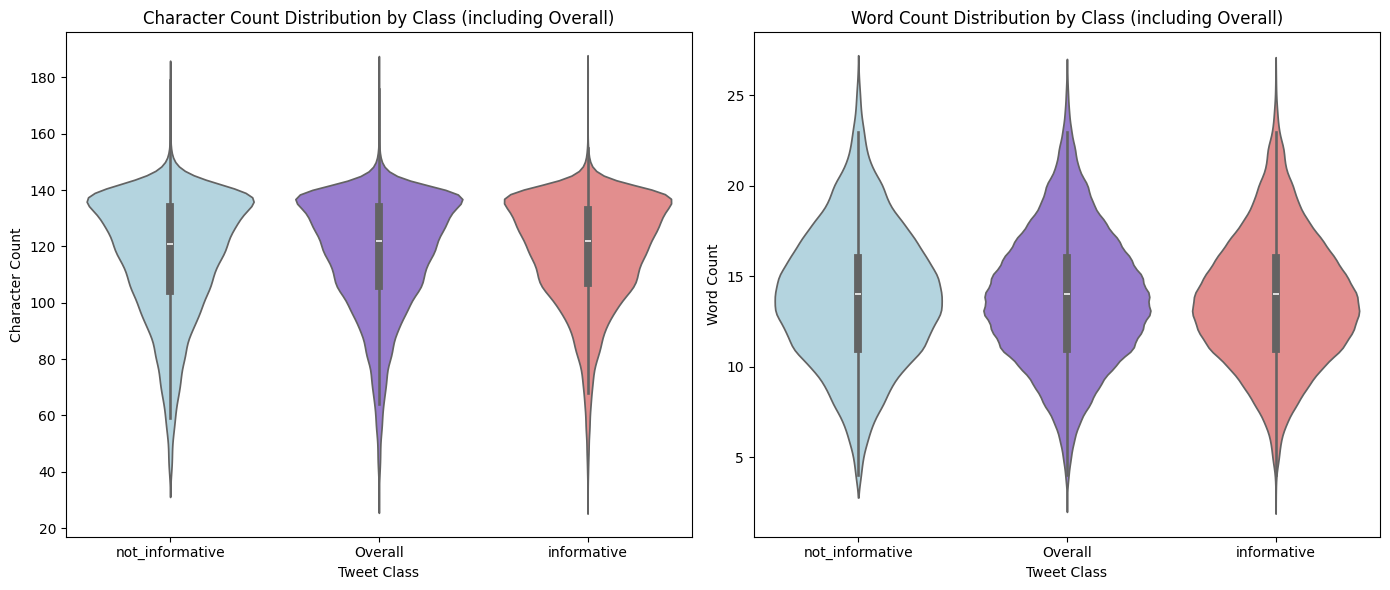

Average tweet lengths by class:
                 char_count  word_count
image_info                             
informative      118.449861   13.692874
not_informative  116.538356   13.927768

Overall averages:
   char_count  word_count
0  117.529311   13.805995


In [62]:
label_column = "image_info"

# Compute length features
df["char_count"] = df["tweet_text"].astype(str).apply(len)
df["word_count"] = df["tweet_text"].astype(str).apply(lambda x: len(x.split()))

# Create a copy for overall distribution
df_overall = df.copy()
df_overall[label_column] = "Overall"

# Combine original and overall data
df_combined = pd.concat([df, df_overall], ignore_index=True)

# Define custom order
label_order = ["not_informative", "Overall", "informative"] if "informative" in df[label_column].unique() else sorted(df[label_column].unique()) + ["Overall"]

# Plot
plt.figure(figsize=(14, 6))

# Character count violin
plt.subplot(1, 2, 1)
sns.violinplot(data=df_combined, x=label_column, y="char_count",
               order=label_order,
               palette={"not_informative": "lightblue", "informative": "lightcoral", "Overall": "mediumpurple"},
               hue=label_column,
               legend=False)
plt.title("Character Count Distribution by Class (including Overall)")
plt.xlabel("Tweet Class")
plt.ylabel("Character Count")

# Word count violin
plt.subplot(1, 2, 2)
sns.violinplot(data=df_combined, x=label_column, y="word_count",
               order=label_order,
               palette={"not_informative": "lightblue", "informative": "lightcoral", "Overall": "mediumpurple"},
               hue=label_column,
               legend=False)
plt.title("Word Count Distribution by Class (including Overall)")
plt.xlabel("Tweet Class")
plt.ylabel("Word Count")

plt.tight_layout()
plt.show()

# Print averages
print("Average tweet lengths by class:")
print(df.groupby(label_column)[["char_count", "word_count"]].mean())
print("\nOverall averages:")
print(df[["char_count", "word_count"]].mean().to_frame().T)

In [95]:
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aceto\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


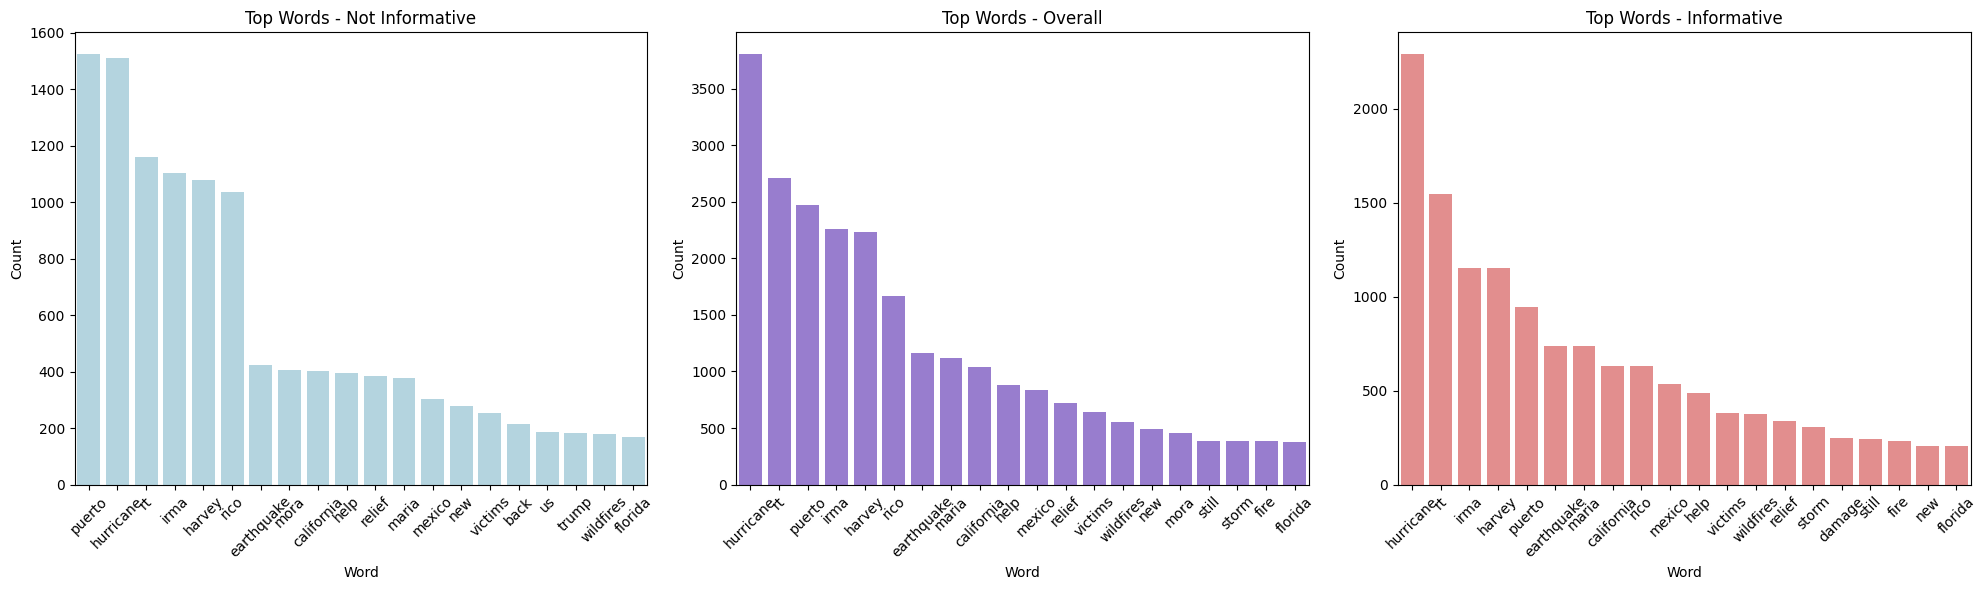

In [96]:
label_column = "image_info"
text_column = "tweet_text"

# Function to extract most frequent words
def get_top_words(texts, n=20):
    words = " ".join(texts.dropna().astype(str)).split()
    filtered = [w.lower() for w in words if w.lower() not in stop_words and w.isalpha()]
    return Counter(filtered).most_common(n)

# Extract top words
top_words_informative = get_top_words(df[df[label_column] == "informative"][text_column])
top_words_not_informative = get_top_words(df[df[label_column] == "not_informative"][text_column])
top_words_overall = get_top_words(df[text_column])

# Convert to DataFrames
df_informative = pd.DataFrame(top_words_informative, columns=["word", "count"])
df_not_informative = pd.DataFrame(top_words_not_informative, columns=["word", "count"])
df_overall = pd.DataFrame(top_words_overall, columns=["word", "count"])

fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=False)

# Not Informative
sns.barplot(data=df_not_informative, x="word", y="count", ax=axes[0], color="lightblue")
axes[0].set_title("Top Words - Not Informative")
axes[0].set_xlabel("Word")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

# Overall
sns.barplot(data=df_overall, x="word", y="count", ax=axes[1], color="mediumpurple")
axes[1].set_title("Top Words - Overall")
axes[1].set_xlabel("Word")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

# Informative
sns.barplot(data=df_informative, x="word", y="count", ax=axes[2], color="lightcoral")
axes[2].set_title("Top Words - Informative")
axes[2].set_xlabel("Word")
axes[2].set_ylabel("Count")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


(1200, 800)
Image Label Task 1: informative
Image Label Confidence: 1.0

Image Label Task 2: infrastructure_and_utility_damage
Image Label Confidence: 1.0

Image Label Task 3: severe_damage
Image Label Confidence: 0.6549


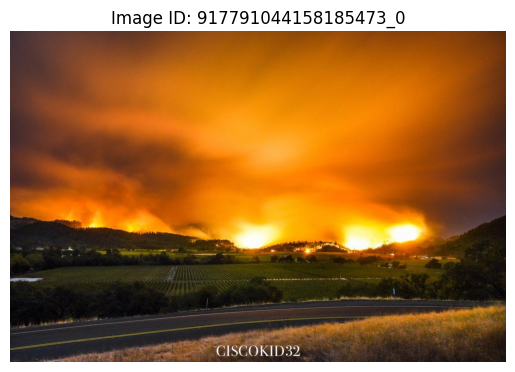

In [ ]:
random_row = df.iloc[100]
image_path = random_row["image_path"]

# Open and display the image
image = Image.open(image_path)

print(f'Image Label Task 1: {random_row["image_info"]}')
print(f'Image Label Confidence: {random_row["image_info_conf"]}')
print(f'\nImage Label Task 2: {random_row["image_human"]}')
print(f'Image Label Confidence: {random_row["image_human_conf"]}')
print(f'\nImage Label Task 3: {random_row["image_damage"]}')
print(f'Image Label Confidence: {random_row["image_damage_conf"]}')

plt.imshow(image)
plt.axis('off')
plt.title(f"Image ID: {df.iloc[0]['image_id']}")
plt.show()


In [ ]:
# Inizializza le liste
widths = []
heights = []
aspect_ratios = []
missing = []

# iteration on each image
for idx, row in tqdm(df.iterrows(), total=len(df)):
    image_path = row["image_path"]

    try:
        with Image.open(image_path) as img:
            w, h = img.size
            widths.append(w)
            heights.append(h)
            aspect_ratios.append(w / h)
    except Exception as e:
        #for missing images
        missing.append(row["image_path"])
        widths.append(None)
        heights.append(None)
        aspect_ratios.append(None)

#Added to the dataframe
df["img_width"] = widths
df["img_height"] = heights
df["img_aspect_ratio"] = aspect_ratios


100%|██████████| 18082/18082 [06:01<00:00, 50.07it/s]


In [89]:
print(f'{len(df["img_width"].unique())} Different width values')
print(f'{len(df["img_height"].unique())} Different height values')
print(f'{len(df["img_aspect_ratio"].unique())} Different aspect ratio values')


949 Different width values
1037 Different height values
4728 Different aspect ratio values
